In [84]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import mapping
from rasterio.plot import show
import os

# Raster input

## Metadata

In [85]:
# Charger l'image TIFF
tiff_path = 'C:/Users/hp/Desktop/Dataset/18-12-L.tif'
with rasterio.open(tiff_path) as src:
    tiff_image = src.read()
# Afficher les métadonnées
print(src.meta)


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 5322, 'height': 3547, 'count': 3, 'crs': CRS.from_epsg(26191), 'transform': Affine(0.8456461772462203, 0.0, 211499.70668070618,
       0.0, -0.8456461772462208, 209999.5413384913)}


## Statistics   : Median, ecart-type, mean

In [86]:
with rasterio.open(tiff_path) as src:
    for i in range(1, src.count + 1):
        band = src.read(i)
        print(f"Statistiques pour la Bande {i}:")
        print(f" - Moyenne: {np.mean(band)}")
        print(f" - Médiane: {np.median(band)}")
        print(f" - Écart-type: {np.std(band)}")
        print()


Statistiques pour la Bande 1:
 - Moyenne: 203.41351801602934
 - Médiane: 219.0
 - Écart-type: 50.468486335883476

Statistiques pour la Bande 2:
 - Moyenne: 197.8826463275622
 - Médiane: 213.0
 - Écart-type: 49.89742908371332

Statistiques pour la Bande 3:
 - Moyenne: 193.498286286467
 - Médiane: 208.0
 - Écart-type: 49.23207690271249



## Maximum locaux : Min Max

In [112]:
# Mapping des couleurs des bandes
band_colors = {
    1: 'Rouge',
    2: 'Vert',
    3: 'Bleu'
}

with rasterio.open(tiff_path) as src:
    print("Maximum et Minimum pour chaque canal de couleur :")
    
    for i in range(1, src.count + 1):

        color_name = band_colors.get(i, 'Inconnu')
        
        print(f"\nStatistiques pour la Bande {i} ({color_name}) :")
        print(f" - Min: {np.min(band)}")
        print(f" - Max: {np.max(band)}")


Maximum et Minimum pour chaque canal de couleur :

Statistiques pour la Bande 1 (Rouge) :
 - Min: 0
 - Max: 254

Statistiques pour la Bande 2 (Vert) :
 - Min: 0
 - Max: 254

Statistiques pour la Bande 3 (Bleu) :
 - Min: 0
 - Max: 254


## Dimensions et Ratio d'Aspect de l'Image TIFF

In [88]:
with rasterio.open(tiff_path) as src:
    width = src.width
    height = src.height
    aspect_ratio = width / height

    print(f"Largeur : {width}")
    print(f"Hauteur : {height}")
    print(f"Aspect Ratio : {aspect_ratio:.2f}")


Largeur : 5322
Hauteur : 3547
Aspect Ratio : 1.50


## Nombre total de pixels

In [89]:
with rasterio.open(tiff_path) as src:
    width = src.width
    height = src.height
    total_pixels = width * height
    print(f"Nombre total de pixels : {total_pixels}")


Nombre total de pixels : 18877134


##  Couverture des couleurs dominantes dans l'image TIFF

In [90]:
thresholds = {
    'Rouge dominant': [200, 100, 100],
    'Vert dominant': [100, 200, 100],
    'Bleu dominant': [100, 100, 200],
    'Neutre': [128, 128, 128]
}

with rasterio.open(tiff_path) as src:
    red_band = src.read(1)
    green_band = src.read(2)
    blue_band = src.read(3)

    for name, (r_thresh, g_thresh, b_thresh) in thresholds.items():
        mask = (red_band > r_thresh) & (green_band > g_thresh) & (blue_band > b_thresh)
        coverage = np.sum(mask) / mask.size * 100
        print(f"Couverture de {name}: {coverage:.2f}%")


Couverture de Rouge dominant: 80.43%
Couverture de Vert dominant: 74.30%
Couverture de Bleu dominant: 66.30%
Couverture de Neutre: 91.25%


## Valeurs abberantes

In [91]:
import rasterio
import numpy as np

# Mapping des couleurs des bandes
band_colors = {
    1: 'Rouge',
    2: 'Vert',
    3: 'Bleu'
}

with rasterio.open(tiff_path) as src:
    for i in range(1, src.count + 1):
        band = src.read(i)
        q1 = np.percentile(band, 25)
        q3 = np.percentile(band, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = ((band < lower_bound) | (band > upper_bound)).sum()
        color_name = band_colors.get(i, 'Inconnu')
        print(f"Nombre de valeurs aberrantes dans la Bande {color_name}: {outliers}")


Nombre de valeurs aberrantes dans la Bande Rouge: 2262699
Nombre de valeurs aberrantes dans la Bande Vert: 2150908
Nombre de valeurs aberrantes dans la Bande Bleu: 2116790


## Correlation  entre colors

In [92]:
band_colors = {
    1: 'Rouge',
    2: 'Vert',
    3: 'Bleu'
}

with rasterio.open(tiff_path) as src:
    bands = [src.read(i).flatten() for i in range(1, src.count + 1)]
    # Utilisation des noms de couleurs pour les colonnes du DataFrame
    df = pd.DataFrame(np.array(bands).T, columns=[band_colors[i] for i in range(1, src.count + 1)])
    
    correlation_matrix = df.corr()
    print("Matrice de corrélation entre les bandes :")
    print(correlation_matrix)


Matrice de corrélation entre les bandes :
          Rouge      Vert      Bleu
Rouge  1.000000  0.999254  0.998357
Vert   0.999254  1.000000  0.999474
Bleu   0.998357  0.999474  1.000000


## Histogramme de 3 canaux

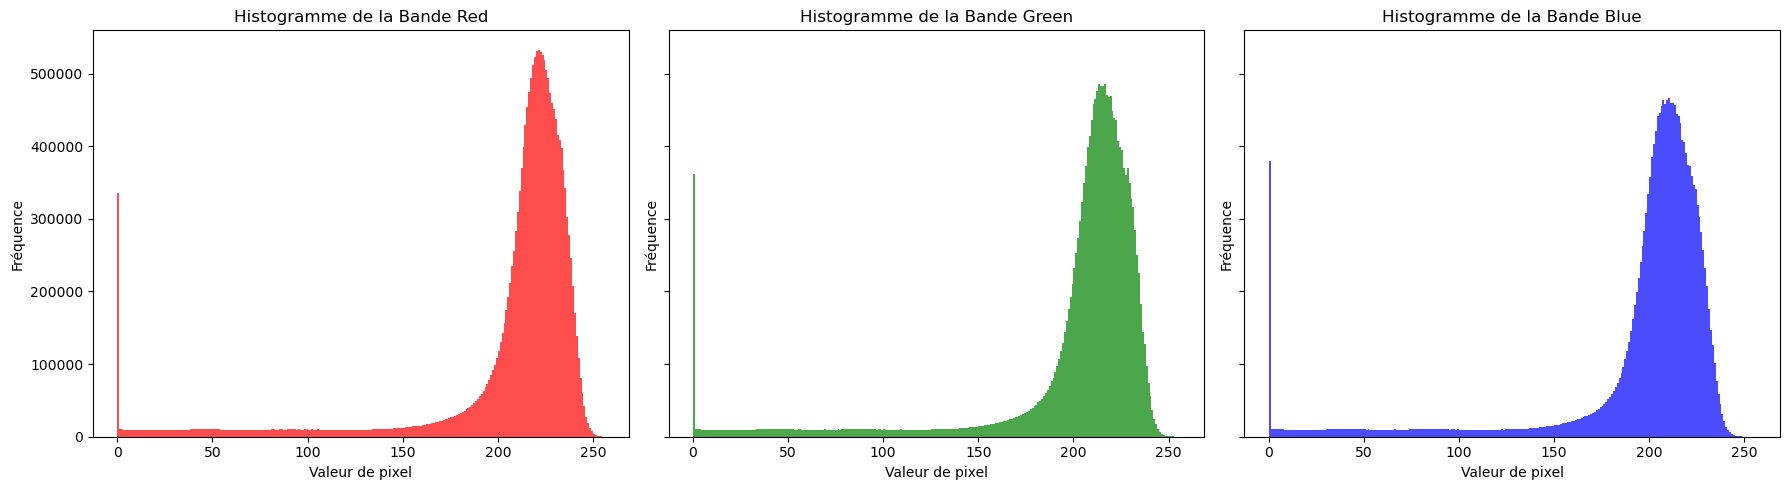

In [93]:
band_colors = {
    1: 'red',    # Remplace 'Rouge' par 'red'
    2: 'green',  # Remplace 'Vert' par 'green'
    3: 'blue'    # Remplace 'Bleu' par 'blue'
}

# Ouvrir l'image TIFF
with rasterio.open(tiff_path) as src:
    # Créer une figure avec trois sous-graphiques
    fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    # Boucle à travers les bandes
    for i in range(1, src.count + 1):
        band = src.read(i).flatten()  # Lire et aplatir la bande
        axs[i-1].hist(band, bins=256, range=(0, 256), color=band_colors[i], alpha=0.7)
        axs[i-1].set_title(f'Histogramme de la Bande {band_colors[i].capitalize()}')
        axs[i-1].set_xlabel('Valeur de pixel')
        axs[i-1].set_ylabel('Fréquence')

    # Ajuster l'espacement des sous-graphiques
    plt.tight_layout()
    plt.show()


In [94]:
import rasterio
import numpy as np

# Chemin du fichier TIFF
tiff_path = 'C:/Users/hp/Desktop/Dataset/18-12-L.tif'

# Mapping des couleurs des bandes
band_colors = {
    1: 'Rouge',
    2: 'Vert',
    3: 'Bleu'
}

# Ouvrir l'image TIFF
with rasterio.open(tiff_path) as src:
    # Boucle à travers les bandes
    for i in range(1, src.count + 1):
        band = src.read(i).flatten()  # Lire et aplatir la bande
        
        # Calculer les histogrammes
        hist, bin_edges = np.histogram(band, bins=256, range=(0, 256))
        
        # Obtenir des statistiques descriptives
        min_val = np.min(band)
        max_val = np.max(band)
        mean_val = np.mean(band)
        std_dev = np.std(band)
        
        print(f"Statistiques pour la Bande {band_colors[i]}:")
        print(f"  Valeur minimale : {min_val}")
        print(f"  Valeur maximale : {max_val}")
        print(f"  Valeur moyenne : {mean_val:.2f}")
        print(f"  Écart type : {std_dev:.2f}")
        print(f"  Histogramme :")
        for bin_index in range(len(hist)):
            print(f"    Valeur {bin_edges[bin_index]:.2f} à {bin_edges[bin_index + 1]:.2f} : {hist[bin_index]}")
        print("\n")


Statistiques pour la Bande Rouge:
  Valeur minimale : 0
  Valeur maximale : 255
  Valeur moyenne : 203.41
  Écart type : 50.47
  Histogramme :
    Valeur 0.00 à 1.00 : 335260
    Valeur 1.00 à 2.00 : 10184
    Valeur 2.00 à 3.00 : 10098
    Valeur 3.00 à 4.00 : 9769
    Valeur 4.00 à 5.00 : 9467
    Valeur 5.00 à 6.00 : 9379
    Valeur 6.00 à 7.00 : 8992
    Valeur 7.00 à 8.00 : 9072
    Valeur 8.00 à 9.00 : 9097
    Valeur 9.00 à 10.00 : 9066
    Valeur 10.00 à 11.00 : 9002
    Valeur 11.00 à 12.00 : 8800
    Valeur 12.00 à 13.00 : 9049
    Valeur 13.00 à 14.00 : 8819
    Valeur 14.00 à 15.00 : 8820
    Valeur 15.00 à 16.00 : 8818
    Valeur 16.00 à 17.00 : 8735
    Valeur 17.00 à 18.00 : 8583
    Valeur 18.00 à 19.00 : 8685
    Valeur 19.00 à 20.00 : 8675
    Valeur 20.00 à 21.00 : 8767
    Valeur 21.00 à 22.00 : 8605
    Valeur 22.00 à 23.00 : 8781
    Valeur 23.00 à 24.00 : 8856
    Valeur 24.00 à 25.00 : 8760
    Valeur 25.00 à 26.00 : 8916
    Valeur 26.00 à 27.00 : 8664
    Vale

## Histogram

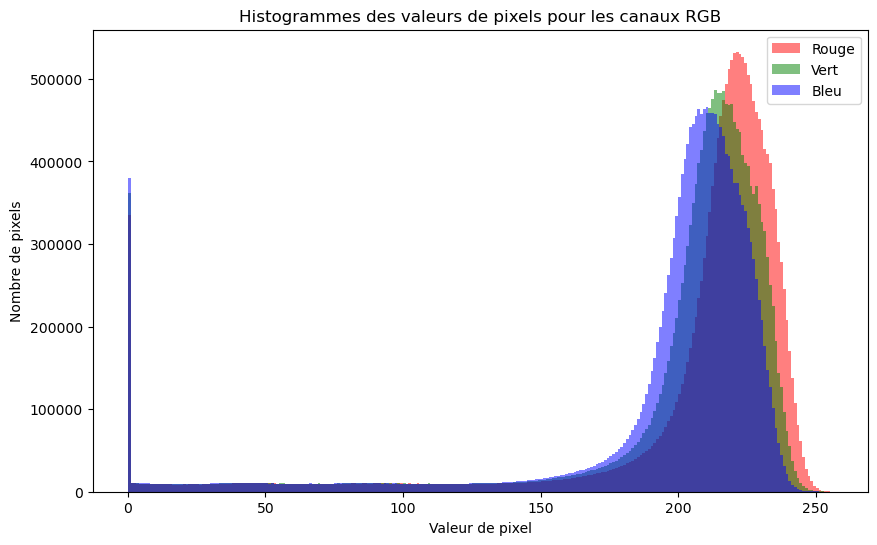

In [95]:
with rasterio.open(tiff_path) as src:
    # Lire les bandes (canaux)
    red_band = src.read(1)   # Bande 1 pour Rouge
    green_band = src.read(2) # Bande 2 pour Vert
    blue_band = src.read(3)  # Bande 3 pour Bleu
    
    # Créer des histogrammes pour chaque canal
    plt.figure(figsize=(10, 6))
    
    plt.hist(red_band.flatten(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Rouge')
    plt.hist(green_band.flatten(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Vert')
    plt.hist(blue_band.flatten(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Bleu')
    
    plt.legend()
    plt.title("Histogrammes des valeurs de pixels pour les canaux RGB")
    plt.xlabel("Valeur de pixel")
    plt.ylabel("Nombre de pixels")
    plt.show()


## Histogram  cumule

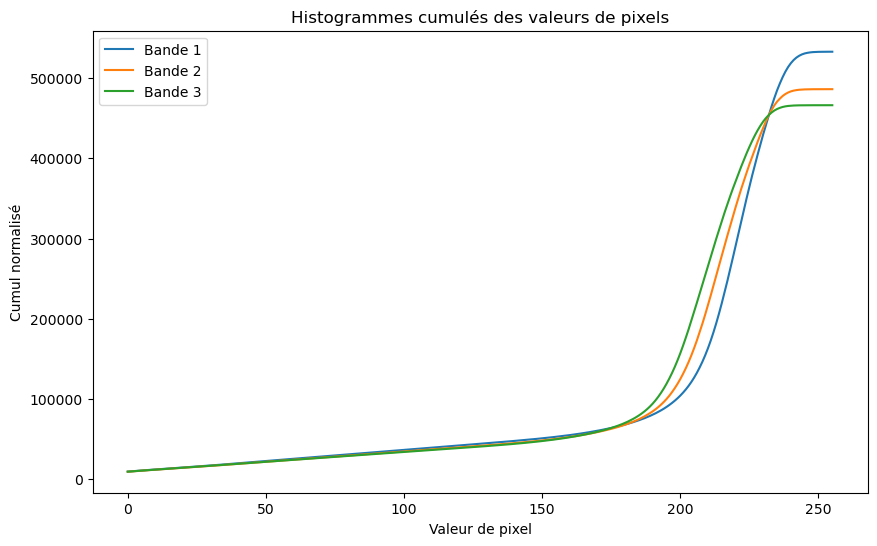

In [96]:
with rasterio.open(tiff_path) as src:
    plt.figure(figsize=(10, 6))
    for i in range(1, src.count + 1):
        band = src.read(i)
        hist, bins = np.histogram(band.flatten(), bins=256, range=(0, 256))
        cdf = hist.cumsum()
        cdf_normalized = cdf * hist.max() / cdf.max()
        plt.plot(cdf_normalized, label=f'Bande {i}')
    
    plt.title("Histogrammes cumulés des valeurs de pixels")
    plt.xlabel("Valeur de pixel")
    plt.ylabel("Cumul normalisé")
    plt.legend()
    plt.show()


# Shapefile output

## Showing the shapefile

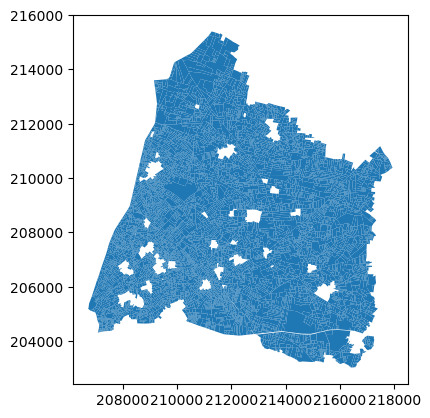

In [82]:
# Visualiser le shapefile
gdf.plot()
plt.show()

## Vérification des Fichiers Shapefile

In [97]:
import geopandas as gpd
import pandas as pd

# Charger le shapefile
shapefile_path = 'C:/Users/hp/Desktop/Dataset/parcellaire S2 V1.shp'
gdf = gpd.read_file(shapefile_path)



output_path = 'C:/Users/hp/Desktop/Dataset'
shapefile_name = 'parcellaire S2 V1'

# Vérifier la présence des fichiers shapefile
shapefile_components = ['.shp', '.shx', '.dbf', '.prj', '.cpg']
missing_files = []

for ext in shapefile_components:
    file_path = os.path.join(output_path, shapefile_name + ext)
    if not os.path.exists(file_path):
        missing_files.append(file_path)

if missing_files:
    print(f"Les fichiers suivants sont manquants : {missing_files}")
else:
    print("Tous les fichiers shapefile sont présents dans le dossier Output.")


Tous les fichiers shapefile sont présents dans le dossier Output.


## Store the shapefile  content on geodataframe

In [98]:
shapefile_path = 'C:/Users/hp/Desktop/Dataset/parcellaire S2 V1.shp'
gdf = gpd.read_file(shapefile_path)
# Afficher les colonnes disponibles
print("\nColonnes disponibles :")
print(gdf.columns)


Colonnes disponibles :
Index(['plle', 'req', 'X', 'ID', 'surface', 'geometry'], dtype='object')


## Showing the first 5 records

In [99]:
# Afficher les premières lignes du GeoDataFrame
print("Premières lignes du GeoDataFrame :")
print(gdf.head())


Premières lignes du GeoDataFrame :
   plle   req     X  ID  surface  \
0  6107  None  None   0   2325.0   
1  6106  None  None   1   4722.0   
2  6104  None  None   2   1540.0   
3  6103  None  None   3   6558.0   
4  6110  None  None   4   7935.0   

                                            geometry  
0  POLYGON ((208978.009 209666.579, 209010.656 20...  
1  POLYGON ((209014.607 209644.715, 209087.482 20...  
2  POLYGON ((209162.017 209575.984, 209185.502 20...  
3  POLYGON ((209224.314 209535.679, 209185.502 20...  
4  POLYGON ((209171.990 209601.850, 209092.925 20...  


## Nombre total de polygones

In [100]:
# Statistiques de base sur les données géométriques
print("\nStatistiques des géométries :")
print(f"Nombre total d'entités : {len(gdf)}")
print(f"Type de géométrie : {gdf.geometry.type.unique()}")


Statistiques des géométries :
Nombre total d'entités : 8221
Type de géométrie : ['Polygon' None 'MultiPolygon']


## Statistiques descriptives sur les attributs non géométriques :  plle ,req,X...

In [101]:
# Statistiques descriptives sur les attributs non géométriques
print("\nStatistiques descriptives sur les attributs non géométriques :")
for column in gdf.columns:
    if column != 'geometry':  # Exclure la colonne de géométrie
        print(f"\nStatistiques pour la colonne '{column}' :")
        print(gdf[column].describe())

# Analyse des attributs spécifiques (exemple : 'class')
if 'class' in gdf.columns:
    print("\nRépartition des classes :")
    print(gdf['class'].value_counts())

# Examen des informations CRS (système de référence spatiale)
print("\nSystème de référence spatiale (CRS) :")
print(gdf.crs)


Statistiques descriptives sur les attributs non géométriques :

Statistiques pour la colonne 'plle' :
count     8183
unique    8045
top       4823
freq         2
Name: plle, dtype: object

Statistiques pour la colonne 'req' :
count             81
unique            79
top       Collective
freq               2
Name: req, dtype: object

Statistiques pour la colonne 'X' :
count       0
unique      0
top       NaN
freq      NaN
Name: X, dtype: object

Statistiques pour la colonne 'ID' :
count    8221.000000
mean     4110.000000
std      2373.342615
min         0.000000
25%      2055.000000
50%      4110.000000
75%      6165.000000
max      8220.000000
Name: ID, dtype: float64

Statistiques pour la colonne 'surface' :
count      8219.000000
mean       9383.883806
std       17655.508768
min         104.000000
25%        2828.000000
50%        5404.000000
75%       10426.500000
max      678649.000000
Name: surface, dtype: float64

Système de référence spatiale (CRS) :
EPSG:26191


In [104]:
# Extraction des géométries
geometries = gdf['geometry']


## Statistics sur les périmètres

In [105]:
#  calculer les périmètres des polygones
perimeters = geometries.length

# Calcul des statistiques descriptives des périmètres
perimeter_stats = perimeters.describe()
print(perimeter_stats)



count    8219.000000
mean      407.420767
std       270.911497
min        42.176036
25%       238.928353
50%       340.503928
75%       492.930197
max      3907.463864
dtype: float64


## Statistics sur les aires

In [106]:
## calculer les aires des polygones
areas = geometries.area

area_stats = areas.describe()
print(area_stats)

count      8219.000000
mean       9378.973502
std       17646.288331
min         104.041706
25%        2826.362921
50%        5400.909415
75%       10421.282420
max      678306.642598
dtype: float64


## Histogrammes des perimetres et aires

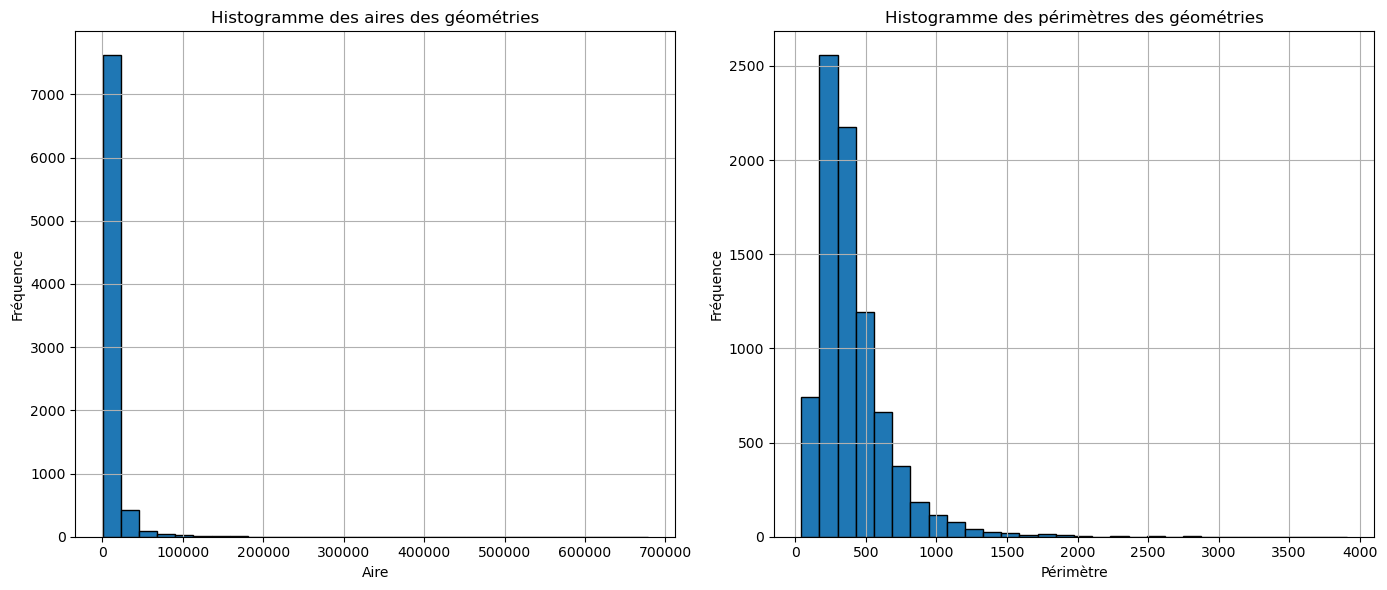

In [56]:
# Analyse de la distribution des aires et des périmètres
import matplotlib.pyplot as plt

# Histogrammes des aires et des périmètres
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
gdf.geometry.area.hist(ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Histogramme des aires des géométries')
ax[0].set_xlabel('Aire')
ax[0].set_ylabel('Fréquence')

gdf.geometry.length.hist(ax=ax[1], bins=30, edgecolor='black')
ax[1].set_title('Histogramme des périmètres des géométries')
ax[1].set_xlabel('Périmètre')
ax[1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


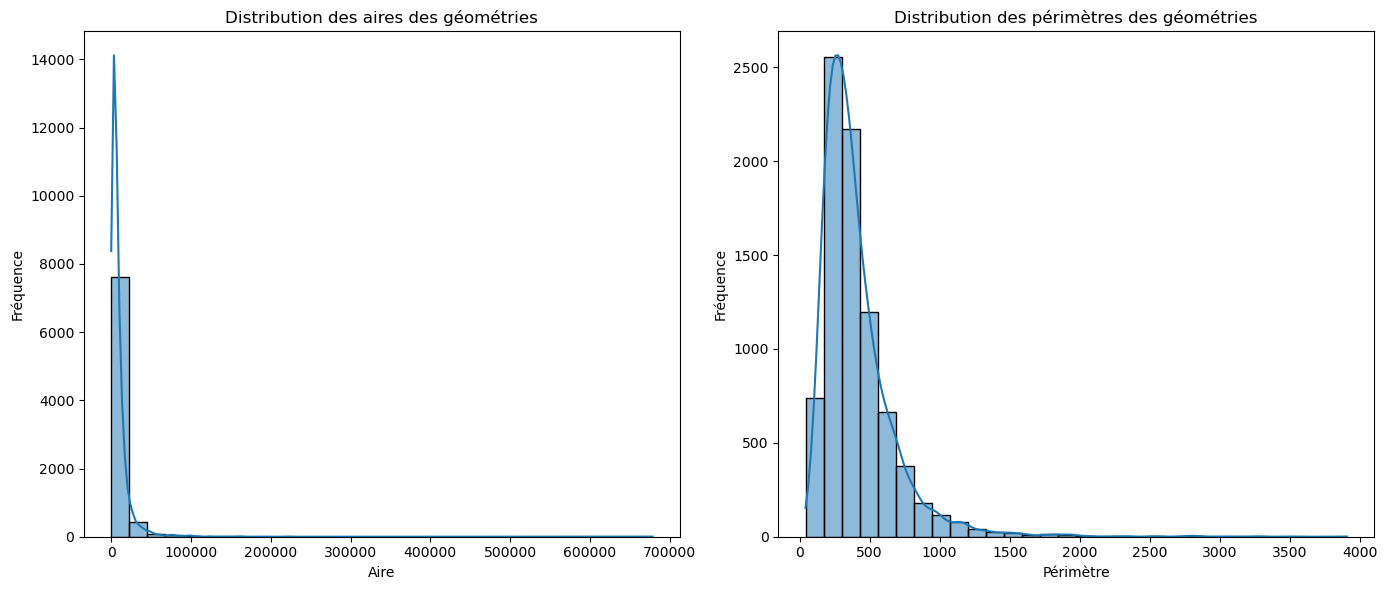

In [66]:
# Visualisation de la distribution des aires et des périmètres
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(gdf.geometry.area, bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution des aires des géométries')
ax[0].set_xlabel('Aire')
ax[0].set_ylabel('Fréquence')

sns.histplot(gdf.geometry.length, bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribution des périmètres des géométries')
ax[1].set_xlabel('Périmètre')
ax[1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## Superficie

In [110]:
# Statistiques sur la superficie totale couverte par les géométries
total_area = gdf.geometry.area.sum()
print(f"\nSuperficie totale couverte : {total_area}")

# Calcul de la superficie moyenne par entité
average_area_per_entity = gdf.geometry.area.mean()
print(f"\nSuperficie moyenne par entité : {average_area_per_entity}")



Superficie totale couverte : 77085783.20938681

Superficie moyenne par entité : 9378.973501567929


## Centroids

In [59]:
# Calcul du centreide (moyenne des coordonnées) des géométries
centroids = gdf.geometry.centroid
print("\nCentroides des géométries :")
print(centroids.head())


Centroides des géométries :
0    POINT (208993.146 209631.879)
1    POINT (209074.149 209598.854)
2    POINT (209187.343 209547.641)
3    POINT (209131.543 209603.726)
4    POINT (209048.624 209676.639)
dtype: geometry



Statistiques descriptives des coordonnées :
                   x              y
count    8219.000000    8219.000000
mean   211806.872185  208143.356322
std      2645.516367    2433.416515
min    206886.168260  203054.171442
25%    209600.832737  206175.089282
50%    211509.199055  207830.988300
75%    213930.782309  210080.032987
max    217905.240871  215304.157354


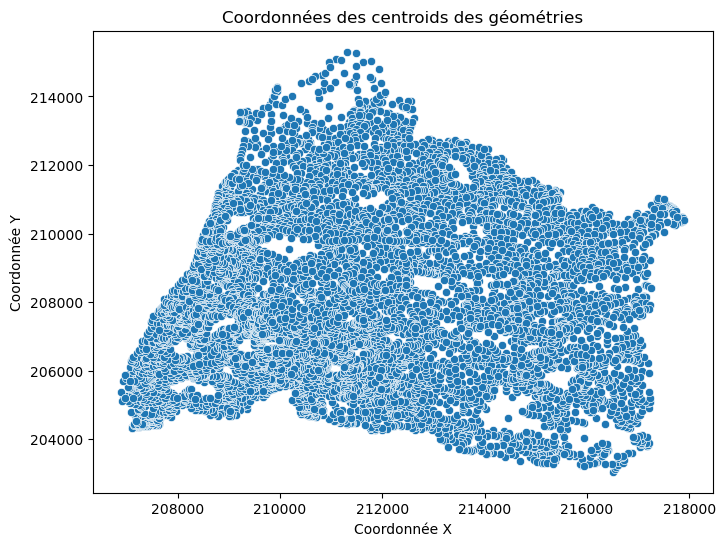

In [111]:
# Analyse spatiale des coordonnées
print("\nStatistiques descriptives des coordonnées :")
coords = pd.DataFrame({
    'x': gdf.geometry.centroid.x,
    'y': gdf.geometry.centroid.y
})
print(coords.describe())

# Visualisation des coordonnées des centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(data=coords, x='x', y='y')
plt.title('Coordonnées des centroids des géométries')
plt.xlabel('Coordonnée X')
plt.ylabel('Coordonnée Y')
plt.show()

In [58]:
# Calcul des coordonnées extrêmes des géométries
bounds = gdf.geometry.bounds
print("\nCoordonnées extrêmes des géométries :")
print(bounds.describe())


Coordonnées extrêmes des géométries :
                minx           miny           maxx           maxy
count    8219.000000    8219.000000    8219.000000    8219.000000
mean   211745.711717  208081.964010  211868.317506  208204.842598
std      2639.943249    2431.751623    2651.755475    2435.750617
min    206731.825355  203023.521605  206952.893186  203091.152497
25%    209547.781191  206121.357596  209642.491755  206239.164684
50%    211459.433245  207774.189382  211559.070884  207888.895874
75%    213855.618261  210030.078416  214019.994843  210132.709818
max    217867.433834  215211.562174  217939.335872  215397.083837


In [61]:
# Information sur le système de référence spatiale (CRS)
print("\nSystème de référence spatiale (CRS) :")
print(gdf.crs)


Système de référence spatiale (CRS) :
EPSG:26191


            minx           miny           maxx           maxy
0  208959.374977  209597.152707  209027.372688  209666.578834
1  209007.580773  209559.666459  209162.016908  209644.715073
2  209150.280740  209519.001666  209224.313827  209575.983851
3  209010.656370  209535.679378  209243.333626  209668.148804
4  208952.734776  209601.849748  209183.262976  209752.978651


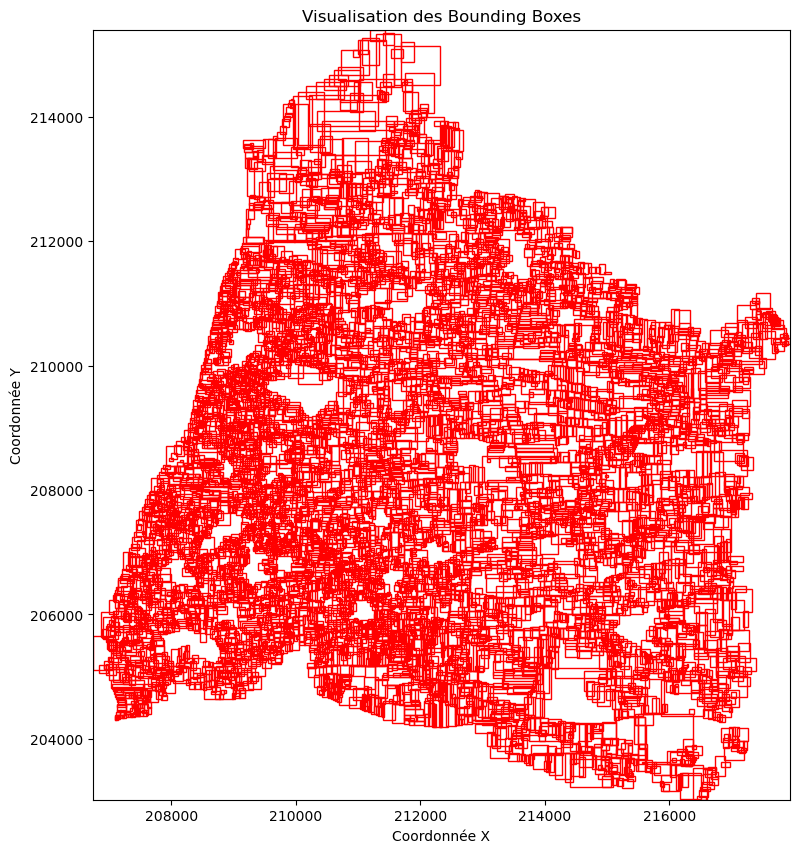

In [75]:
# Filtrer les géométries non nulles et valides
gdf = gdf[gdf.geometry.notnull() & gdf.geometry.is_valid]

# Calcul des bounding boxes (rectangles englobants)
def get_bounds(geometry):
    if geometry:
        return geometry.bounds
    else:
        return (None, None, None, None)

bounding_boxes = gdf.geometry.apply(get_bounds)
bbox_df = pd.DataFrame(list(bounding_boxes), columns=['minx', 'miny', 'maxx', 'maxy'])

# Vérification des données
print(bbox_df.head())

# Visualisation des bounding boxes
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Tracer les bounding boxes
for _, row in bbox_df.iterrows():
    if None not in row:  # Assurer que les coordonnées ne contiennent pas de valeur None
        rect = plt.Rectangle(
            (row['minx'], row['miny']), 
            row['maxx'] - row['minx'], 
            row['maxy'] - row['miny'], 
            edgecolor='r', 
            facecolor='none'
        )
        ax.add_patch(rect)

# Configuration des axes
ax.set_title('Visualisation des Bounding Boxes')
ax.set_xlabel('Coordonnée X')
ax.set_ylabel('Coordonnée Y')
plt.xlim(gdf.geometry.bounds.minx.min(), gdf.geometry.bounds.maxx.max())
plt.ylim(gdf.geometry.bounds.miny.min(), gdf.geometry.bounds.maxy.max())
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [76]:


# Analyse de la distribution des tailles des bounding boxes
bbox_area = (bbox_df['maxx'] - bbox_df['minx']) * (bbox_df['maxy'] - bbox_df['miny'])
print("\nStatistiques des aires des bounding boxes :")
print(bbox_area.describe())

# Analyse de la distance entre les centroids
print("\nStatistiques des distances entre les centroids :")
centroids = gdf.geometry.centroid
distances = centroids.apply(lambda p: centroids.distance(p).mean())
print(distances.describe())


Statistiques des aires des bounding boxes :
count    8.219000e+03
mean     1.924275e+04
std      3.542989e+04
min      1.432879e+02
25%      5.158539e+03
50%      1.030921e+04
75%      2.103091e+04
max      1.051313e+06
dtype: float64

Statistiques des distances entre les centroids :
count    8219.000000
mean     4562.520971
std       833.425655
min      3336.087715
25%      3908.842508
50%      4423.870000
75%      5075.729925
max      7643.011375
dtype: float64


# Correspondance entre shapefile  et  raster

In [17]:
# Vérification de la correspondance des dimensions et de la résolution entre l'image et le shapefile
with rasterio.open(tiff_path) as src:
    tiff_bounds = src.bounds
    shapefile_bounds = gdf.total_bounds

    print("Bornes de l'image TIFF :")
    print(tiff_bounds)
    
    print("Bornes du shapefile :")
    print(shapefile_bounds)
    
    # Vérifier si les bornes correspondent
    if (shapefile_bounds[0] >= tiff_bounds.left and shapefile_bounds[2] <= tiff_bounds.right and
        shapefile_bounds[1] >= tiff_bounds.bottom and shapefile_bounds[3] <= tiff_bounds.top):
        print("Les bornes du shapefile sont compatibles avec celles de l'image TIFF.")
    else:
        print("Les bornes du shapefile ne correspondent pas à celles de l'image TIFF.")


Bornes de l'image TIFF :
BoundingBox(left=211499.70668070618, bottom=207000.03434779897, right=216000.23563601056, top=209999.5413384913)
Bornes du shapefile :
[206731.82535463 203023.52160511 217939.33587197 215397.08383703]
Les bornes du shapefile ne correspondent pas à celles de l'image TIFF.


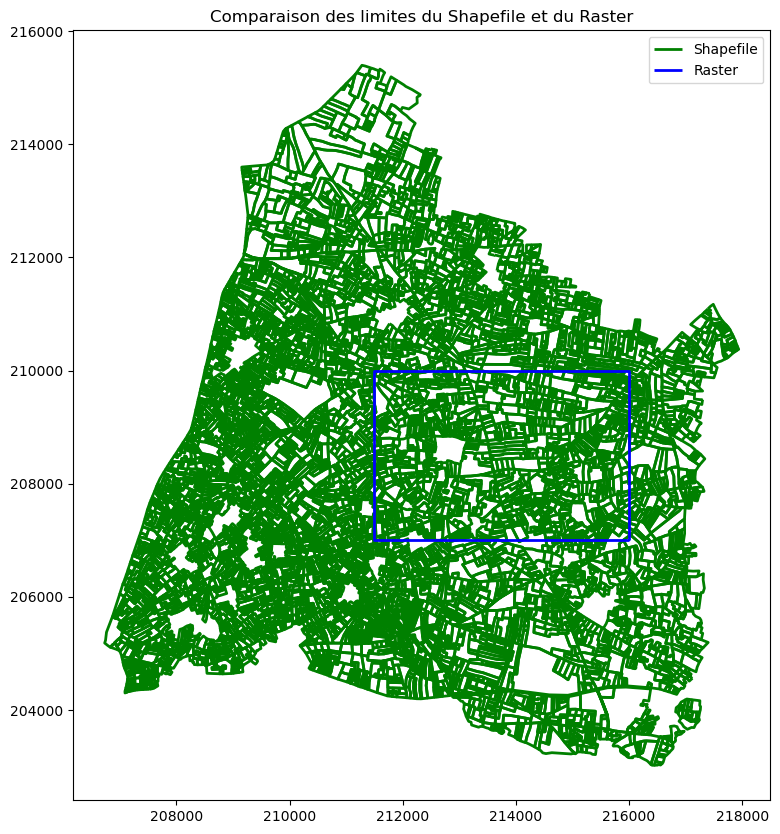

In [117]:
# Visualisation de la superposition
fig, ax = plt.subplots(figsize=(10, 10))

# Affichage des limites du shapefile
shapefile.geometry.boundary.plot(ax=ax, edgecolor='green', linewidth=2, label='Shapefile')

# Affichage des limites du raster
raster_box = box(raster_bounds.left, raster_bounds.bottom, raster_bounds.right, raster_bounds.top)
gpd.GeoSeries([raster_box], crs=shapefile.crs).boundary.plot(ax=ax, edgecolor='blue', linewidth=2, label='Raster')

plt.legend()
plt.title("Comparaison des limites du Shapefile et du Raster")
plt.show()

# Fermer le fichier raster
raster.close()

In [116]:
# Lecture du shapefile
shapefile = gpd.read_file(shapefile_path)

# Lecture du raster
raster = rasterio.open(raster_path)

# Obtenir les limites (bounding boxes) du shapefile et du raster
shapefile_bounds = shapefile.total_bounds
raster_bounds = raster.bounds

print(f"Limites du Shapefile : {shapefile_bounds}")
print(f"Limites du Raster : {raster_bounds}")

# Vérification des tailles des bounding boxes
shapefile_area = (shapefile_bounds[2] - shapefile_bounds[0]) * (shapefile_bounds[3] - shapefile_bounds[1])
raster_area = (raster_bounds.right - raster_bounds.left) * (raster_bounds.top - raster_bounds.bottom)

print(f"Surface couverte par le Shapefile : {shapefile_area}")
print(f"Surface couverte par le Raster : {raster_area}")

if shapefile_area > raster_area:
    print("Le shapefile couvre une surface beaucoup plus grande que le raster.")
else:
    print("Le shapefile est plus petit ou de la même taille que le raster.")

Limites du Shapefile : [206731.82535463 203023.52160511 217939.33587197 215397.08383703]
Limites du Raster : BoundingBox(left=211499.70668070618, bottom=207000.03434779897, right=216000.23563601056, top=209999.5413384913)
Surface couverte par le Shapefile : 138676828.85120103
Surface couverte par le Raster : 13499368.063248819
Le shapefile couvre une surface beaucoup plus grande que le raster.
